In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline
import datetime as dt

C:\Users\user\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
start=dt.datetime(2010,4,1)
end=dt.datetime(2020,4,1)

# Black-Scholes-Merton Model:

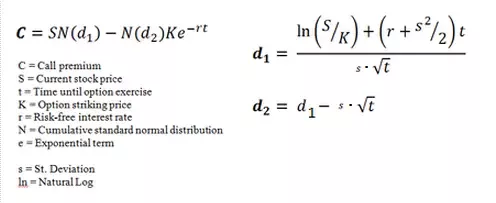

In [3]:
def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))
 
def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

In [4]:
def BSM(S, K, r, stdev, T):
        return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

In [5]:
ticker = 'MSFT'  
data = pd.DataFrame()  
data[ticker] = wb.DataReader(ticker, 'yahoo', start, end)['Adj Close']

In [6]:
#Obtaining latest stock price
S = data.iloc[-1]
S

MSFT    152.110001
Name: 2020-04-01 00:00:00, dtype: float64

In [7]:
#Obtaining the stdev of the stock returns
#Log returns is used as we are considering only Microsoft stock data
log_returns = np.log(1 + data.pct_change())
stdev = log_returns.std() * 250 ** 0.5
stdev

MSFT    0.249328
dtype: float64

In [8]:
#Considering risk free rate(r) as 2.5%
#Assuming the option strike price as 110$
#Assuming time horizon as 1 year
r=0.025
K=110.0
T=1

In [9]:
d1(S, K, r, stdev, T)

MSFT    1.524923
dtype: float64

In [10]:
d2(S, K, r, stdev, T)

MSFT    1.275595
dtype: float64

In [11]:
BSM(S, K, r, stdev, T)

MSFT    45.986744
Name: 2020-04-01 00:00:00, dtype: float64

In [12]:
#The call option price is approx 46$

# Euler Discretization:

In [13]:
#Using the same stock data as the previous method

𝑆𝑡 = 𝑆𝑡-1 exp⁡(( 𝑟 −
1/
2 * var) *
𝜎t +
stdev * √𝜎t * Z𝑡)

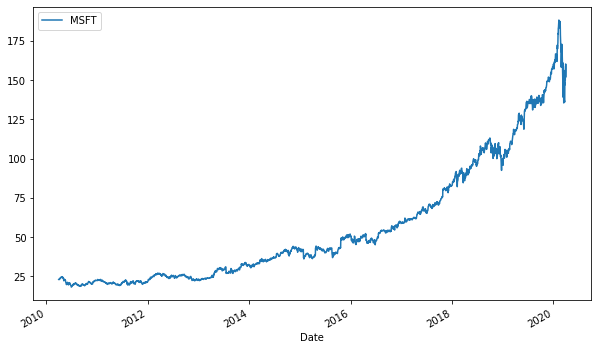

In [14]:
data.plot(figsize=(10, 6))

In [15]:
#Considering risk free rate(r) as 2.5% (same as the previous method)
r=0.025

In [16]:
stdev = log_returns.std() * 250 ** 0.5
stdev = stdev.values
stdev

array([0.24932783])

In [17]:
#Considering the time horizon as 1 year (same as the previous method) so the intervals will be 250(only 250 trading days in a year)
#Considering the random component Z as 10000
T=1
t_intervals = 250
delta_t = T / t_intervals 

iterations=10000

In [18]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0 

for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [19]:
S

array([[152.11000061, 152.11000061, 152.11000061, ..., 152.11000061,
        152.11000061, 152.11000061],
       [149.70094477, 152.5444098 , 152.44590053, ..., 151.37731491,
        152.18563513, 148.59419615],
       [145.15187039, 151.51750968, 154.92177768, ..., 148.58592718,
        150.19374722, 150.09418994],
       ...,
       [156.99022067, 157.86677094, 232.13734981, ..., 169.84846857,
        152.47357915, 155.90214647],
       [157.09811697, 157.46954697, 226.40529468, ..., 172.66177255,
        153.22113807, 154.43113238],
       [154.51804548, 157.8815058 , 226.29347077, ..., 172.2521606 ,
        152.10688662, 154.6940325 ]])

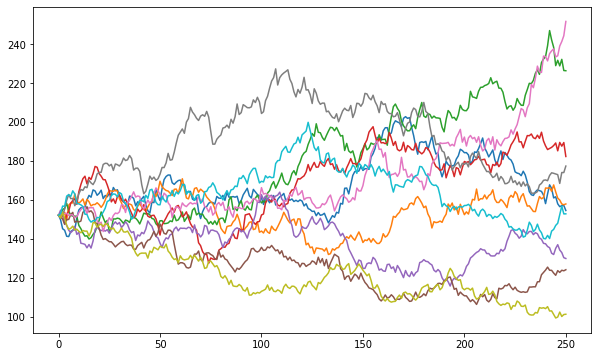

In [20]:
#Plotting the graph of all 250 intervals but only 10 iterations
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10])

In [21]:
p = np.maximum(S[-1] - 110, 0)

C = (e^-rT * ΣPi)/iterations

In [22]:
C = np.exp(-r * T) * np.sum(p) / iterations
C 

46.54402829894114

In [23]:
#The call option price is approx 46.5$

There is approximately 0.5$ difference between the call options.
There is an insignificant but not unimportant difference between the the 2 methods.